In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from collections import Counter

In [2]:
data = pd.read_csv('../../data/lady_mail_horoscope/df_three.csv', sep=';')

In [3]:
data.isna().sum()

titles          0
links           0
articles        0
date            0
len_articles    0
Овен            0
Телец           0
Близнецы        1
Рак             0
Лев             1
Дева            0
Весы            0
Скорпион        0
Стрелец         0
Козерог         0
Водолей         0
Рыбы            0
dtype: int64

In [4]:
data = data.dropna()#data.fillna('0 '*70) лучше дропать, так графики получше, иначе выбросы мешают. А для корпуса можно вернуть

In [5]:
data.head()

titles  \
0  Гороскоп на 18 октября: легко ладить с людьми   
1      Гороскоп на 17 октября: можно разобраться   
2    Гороскоп на 16 октября: можно достичь целей   
3   Гороскоп на 15 октября: настроение улучшится   
4       Гороскоп на 14 октября: укрепляйте связи   

                                               links  \
0  https://lady.mail.ru/article/518299-goroskop-n...   
1  https://lady.mail.ru/article/518227-goroskop-n...   
2  https://lady.mail.ru/article/518225-goroskop-n...   
3  https://lady.mail.ru/article/518224-goroskop-n...   
4  https://lady.mail.ru/article/518223-goroskop-n...   

                                            articles             date  \
0  ['В начале дня возможны напряженные моменты, н...  18 октября 2020   
1  ['Ладить с окружающими сегодня сложнее, чем об...  17 октября 2020   
2  ['В первой половине дня гораздо приятнее будет...  16 октября 2020   
3  ['В первой половине дня многие будут не в лучш...  15 октября 2020   
4  ['Не торопитесь. В начале дня возможны какие-т...  14 октября 2020   

   len_articles                                               Овен  \
0            40   Насыщенный интересный день. За любые дела вы ...   
1            40   Будьте практичны. Этот день может положить на...   
2            40   Благоприятный день. Если вы проявите инициати...   
3            40   Первая половина дня удачна. Вам часто везет, ...   
4            40   Серьезных проблем этот день не приносит, но в...   

                                               Телец  \
0   Вам может быть нелегко отстоять свои интересы...   
1   День складывается удачно, хотя порой вы сами ...   
2   Все складывается хорошо. Появляются отличные ...   
3   Непростой день. Он может принести какие-то ме...   
4   Серьезных проблем не возникает, но все валитс...   

                                            Близнецы  \
0   Тот самый день, когда ваши поступки вызывают ...   
1   Благоприятный день для любых встреч и перегов...   
2   Вас ждет немало соблазнов и искушений, но есл...   
3   Успехи, которых удастся достичь в этот день, ...   
4   Планы приходится менять на ходу, причем време...   

                                                 Рак  \
0   Для самостоятельной работы это не самый подхо...   
1   День подходит для решения любых вопросов, в т...   
2   Подходящий день для начала новых дел, в том ч...   
3   Первая половина дня проходит очень плодотворн...   
4   Начинается день не лучшим образом. Вы огорчае...   

                                                 Лев  \
0   Вы без труда завоевываете симпатии новых знак...   
1   Вы способны на многое и сами это понимаете. Н...   
2   Дела сегодня требуют больше осторожности, чем...   
3   День проходит спокойно, позволяет вам осущест...   
4   Вряд ли удастся совершенно избежать неприятны...   

                                                Дева  \
0   Первая половина дня проходит спокойно. Можно ...   
1   Утро потребует осторожности в делах и сдержан...   
2   Не все задачи удается решить так быстро, как ...   
3   На утро лучше не планировать важных дел. Неже...   
4   Будьте осторожны и внимательны, старайтесь да...   

                                                Весы  \
0   Благоприятный день для общения. Удается произ...   
1   Удачный день. Открываются новые возможности, ...   
2   Первая половина дня складывается удачно. Вы п...   
3   Насыщенный день. Влияние позитивных тенденций...   
4   Вы почувствуете себя незаменимым человеком: з...   

                                            Скорпион  \
0   Не спешите. Это не тот день, когда можно за с...   
1   Утро проходит очень плодотворно. В это время ...   
2   Нужно быть осторожнее: это напряженный и слож...   
3   Удачный гармоничный день, обещающий новые при...   
4   День приносит неприятные эмоции, с которыми п...   

                                             Стрелец  \
0   Напряженный день. Будьте осторожны и внимател...   
1   Вы решите многие проблемы, если расстанетесь ...   
2   П

In [6]:
info = pd.DataFrame()

In [7]:
for col in ['Овен', 'Телец',
       'Близнецы', 'Рак', 'Лев', 'Дева', 'Весы', 'Скорпион', 'Стрелец',
       'Козерог', 'Водолей', 'Рыбы']:
    info[col + '_len'] = data[col].apply(lambda x: len(str(x).split(' ')))

In [8]:
info.mean()

Овен_len        77.656958
Телец_len       77.546926
Близнецы_len    76.313916
Рак_len         76.563107
Лев_len         76.320388
Дева_len        76.624595
Весы_len        76.708738
Скорпион_len    77.181230
Стрелец_len     76.436893
Козерог_len     76.355987
Водолей_len     76.957929
Рыбы_len        90.809061
dtype: float64

Хм, очень странно, что такое отличие для рыб. Посмотрим на гистограммы. 

In [9]:
# for col in ['Овен', 'Телец',
#        'Близнецы', 'Рак', 'Лев', 'Дева', 'Весы', 'Скорпион', 'Стрелец',
#        'Козерог', 'Водолей', 'Рыбы']:
    
#     axes = info[col+'_len'].hist(bins = 30)
#     plt.suptitle(col)
#     plt.show()

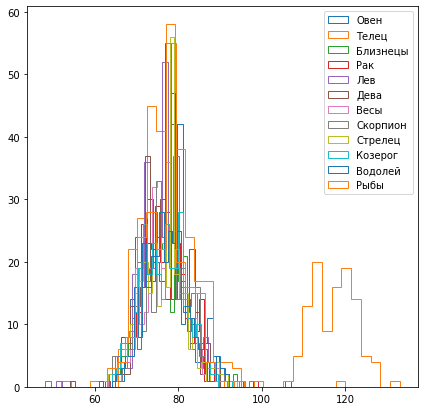

In [10]:
plt.figure(figsize=(7,7))
for col in ['Овен', 'Телец',
       'Близнецы', 'Рак', 'Лев', 'Дева', 'Весы', 'Скорпион', 'Стрелец',
       'Козерог', 'Водолей', 'Рыбы']:
    
    plt.hist(info[col+'_len'],bins = 30,histtype='step',label= col )#.hist(bins = 30,l)
plt.legend()

Text(0.5, 1.0, 'Количество слов по знакам')

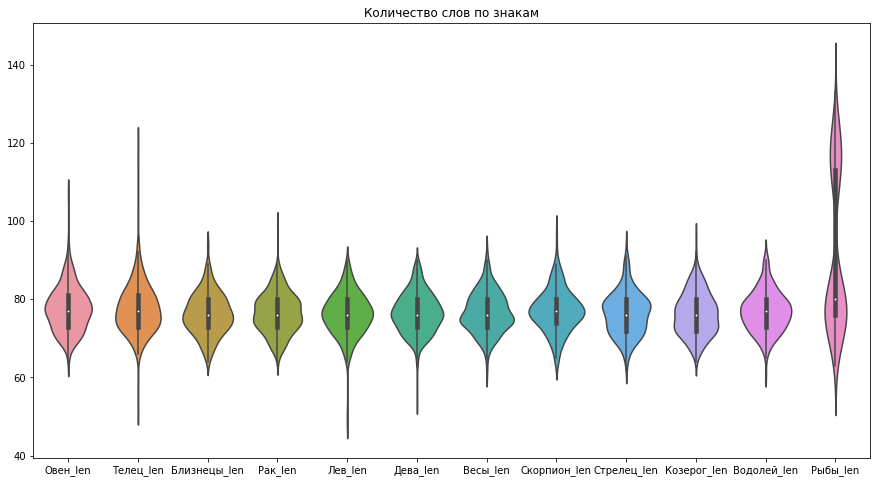

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(ax=ax,data = info.iloc[:,:12])
plt.title('Количество слов по знакам')

In [12]:
for col in ['Овен', 'Телец',
       'Близнецы', 'Рак', 'Лев', 'Дева', 'Весы', 'Скорпион', 'Стрелец',
       'Козерог', 'Водолей', 'Рыбы']:
    info[col + '_len_char'] = data[col].apply(lambda x: len(x))

Text(0.5, 1.0, 'Количество символов по знакам')

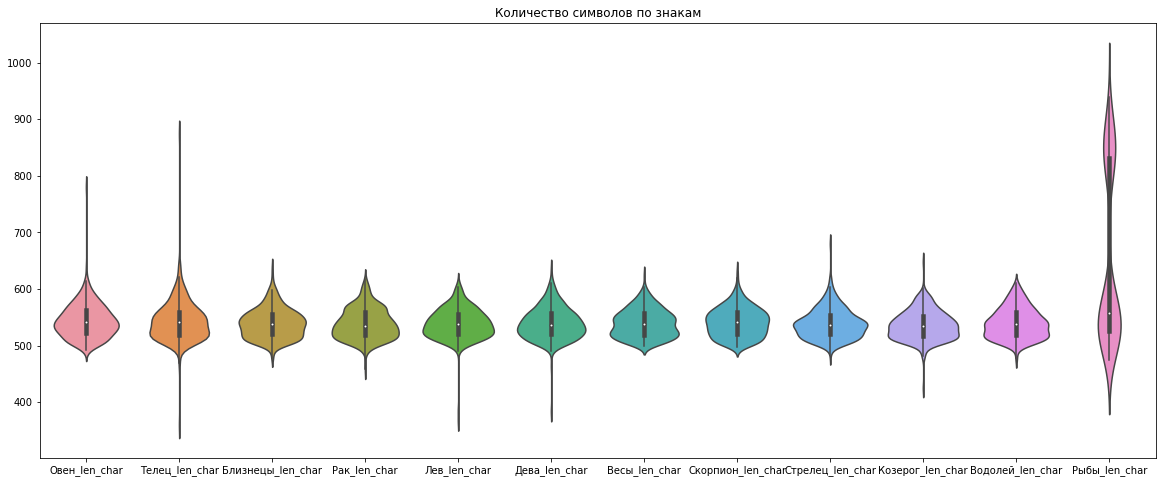

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.violinplot(ax=ax,data = info.iloc[:,12:24])
plt.title('Количество символов по знакам')

In [14]:
for col in ['Овен', 'Телец',
       'Близнецы', 'Рак', 'Лев', 'Дева', 'Весы', 'Скорпион', 'Стрелец',
       'Козерог', 'Водолей', 'Рыбы']:
    info[col + '_unique'] = data[col].apply(lambda x: len(set(w for w in x.split())))

Text(0.5, 1.0, 'Количество уникальных слов в тексте по знакам')

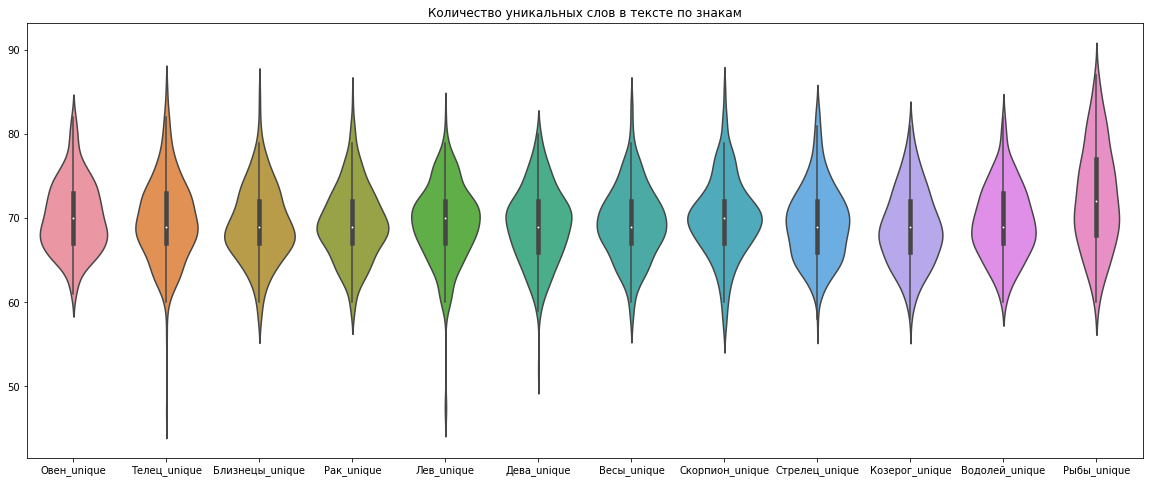

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.violinplot(ax=ax,data = info.iloc[:,24:36])
plt.title('Количество уникальных слов в тексте по знакам')

In [102]:
stop_words = (stopwords.words('russian'))
stop_words.extend([u'что', u'это', u'так',
                       u'вот', u'быть', u'как',
                       u'в', u'—', u'к',
                       u'на', u'ок',
                       u'который', u'весь',
                       u'еще', u'также', u'свой',
                       u'ещё', u'самый',])

In [33]:
corpus = []

In [34]:
for col in ['Овен', 'Телец',
       'Близнецы', 'Рак', 'Лев', 'Дева', 'Весы', 'Скорпион', 'Стрелец',
       'Козерог', 'Водолей', 'Рыбы']:
       for val in data[col].values:
         corpus.append(val)

In [36]:
text = ''.join([x for x in corpus])

In [76]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=1000, height=500,colormap='Dark2').generate(text)

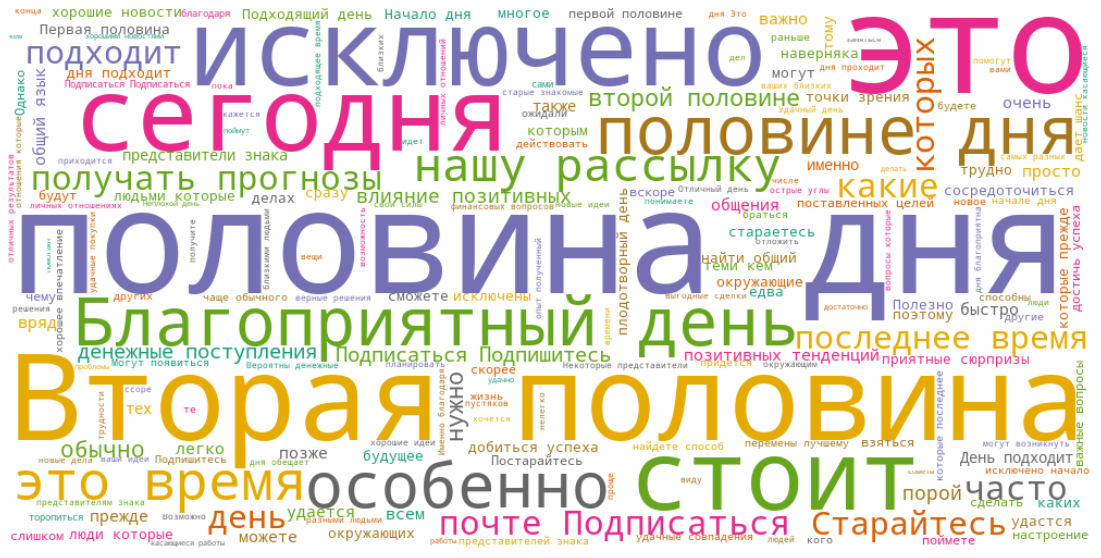

In [77]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear',)
plt.axis("off")
plt.show()

In [82]:
info['Рыбы_len_char'].idxmax()

310

In [83]:
data['Рыбы'][309]

' Чем реалистичнее вы смотрите на вещи, тем удачнее и плодотворнее пройдет этот день. Он подходит для домашних дел или покупки каких-то вещей, благодаря которым ваша повседневная жизнь станет проще. Главное – делать выбор самостоятельно. Ведь ваша интуиция сейчас очень остра и дает самые точные подсказки. Можно строить долгосрочные планы, обсуждать их с вероятными союзниками и друзьями, которые дадут отличные советы. Ваша поддержка может понадобиться старшим родственникам; старайтесь не отказывать им. Подпишитесь на нашу рассылку, чтобы получать прогнозы по почте Подписаться Подпишитесь на нашу рассылку, чтобы получать прогнозы по почте Подписаться Подпишитесь на нашу рассылку, чтобы получать прогнозы по почте Подписаться Подпишитесь на нашу рассылку, чтобы получать прогнозы по почте Подписаться Подписаться'

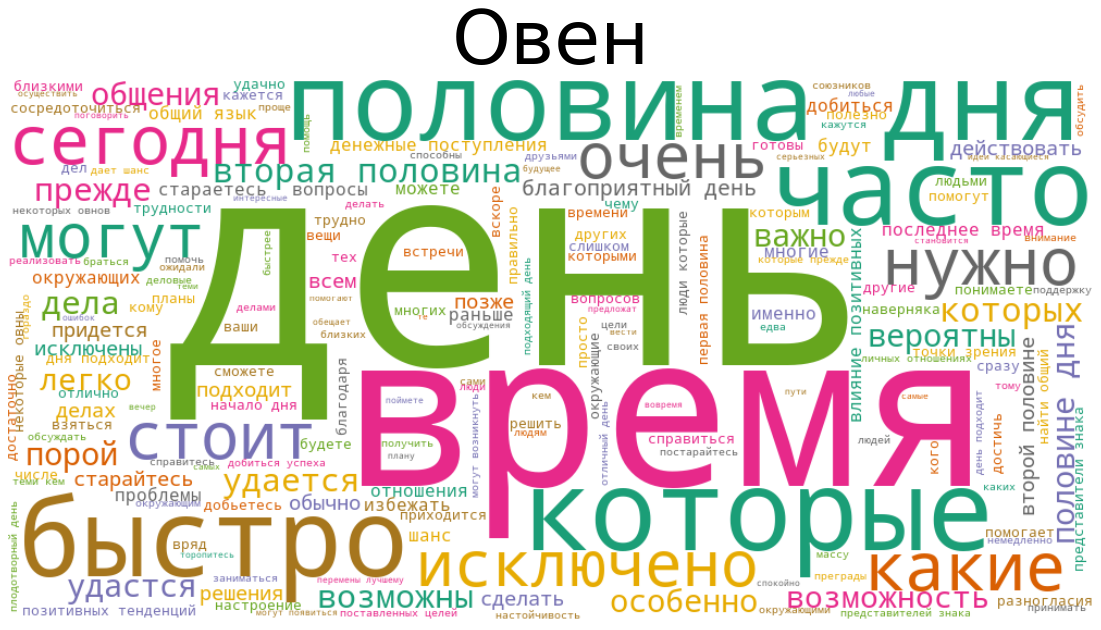

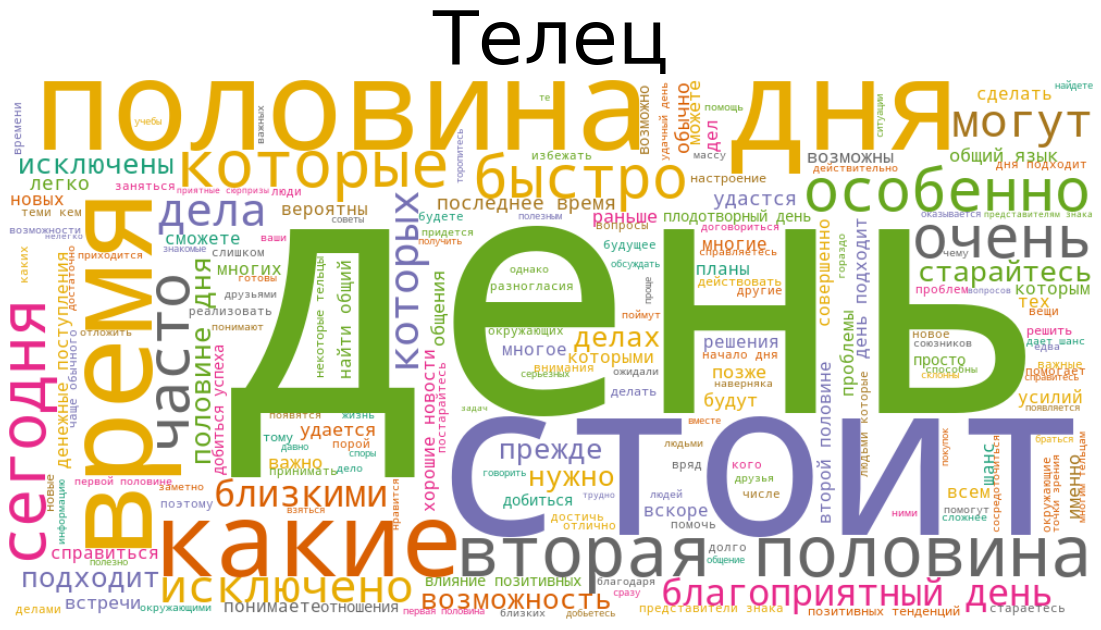

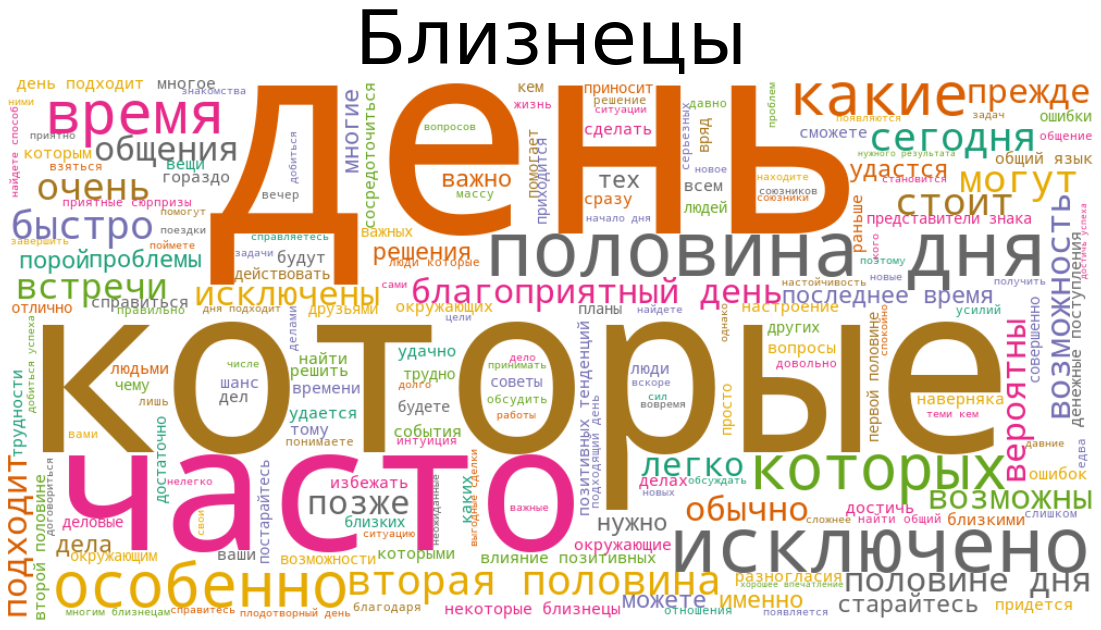

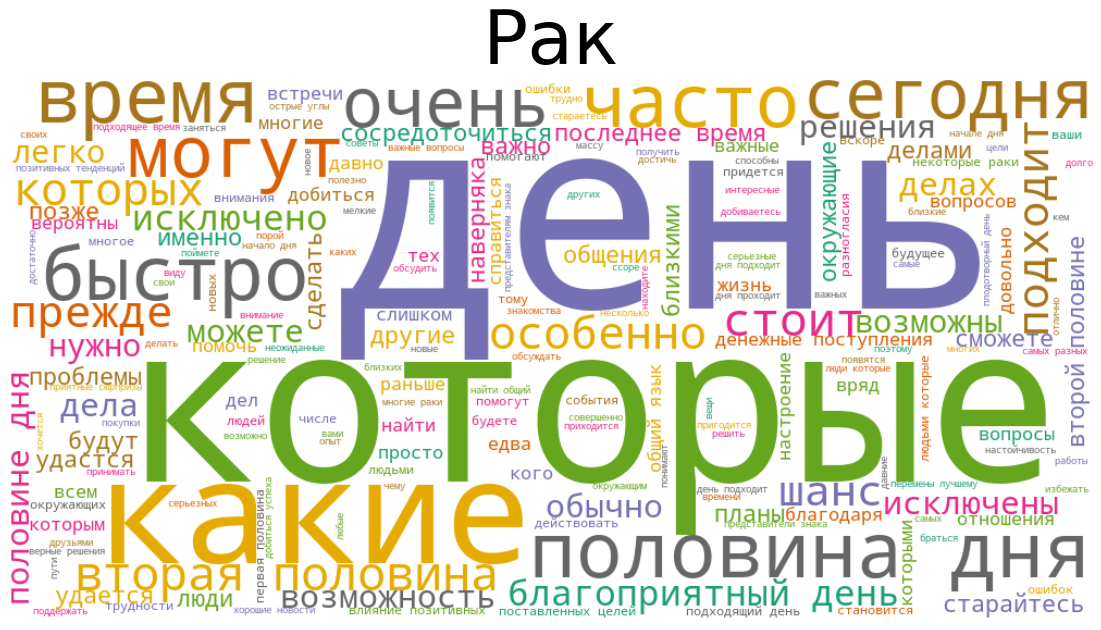

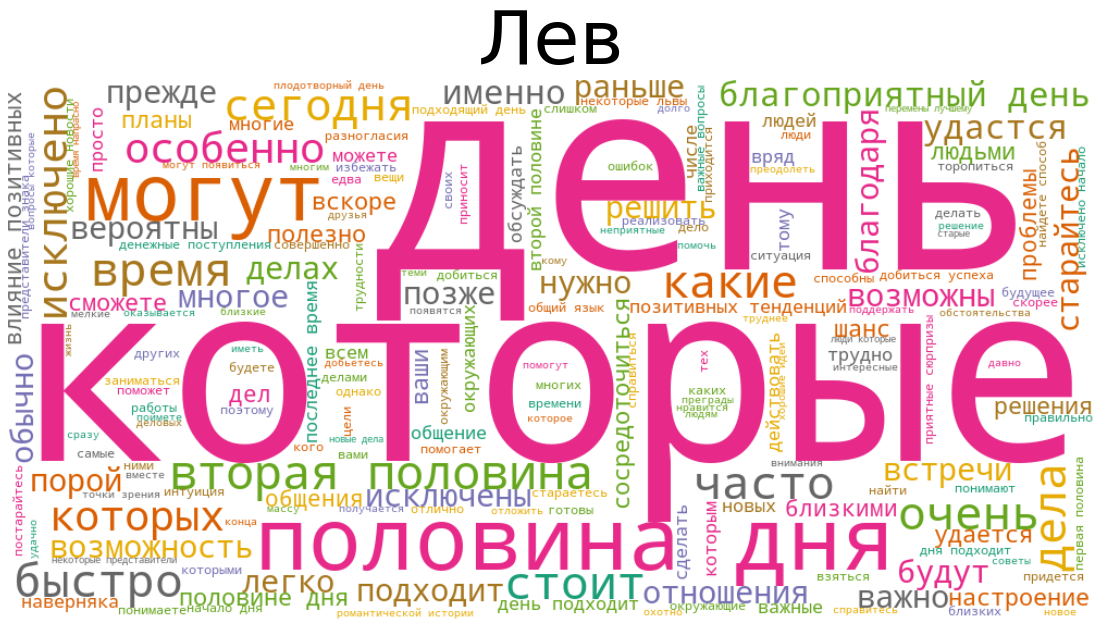

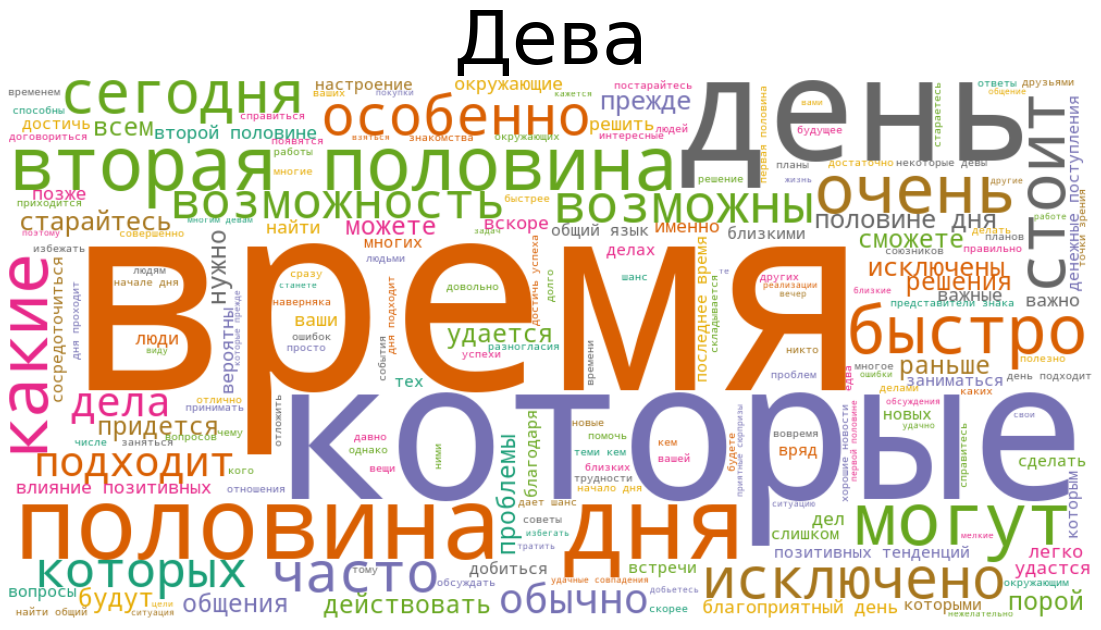

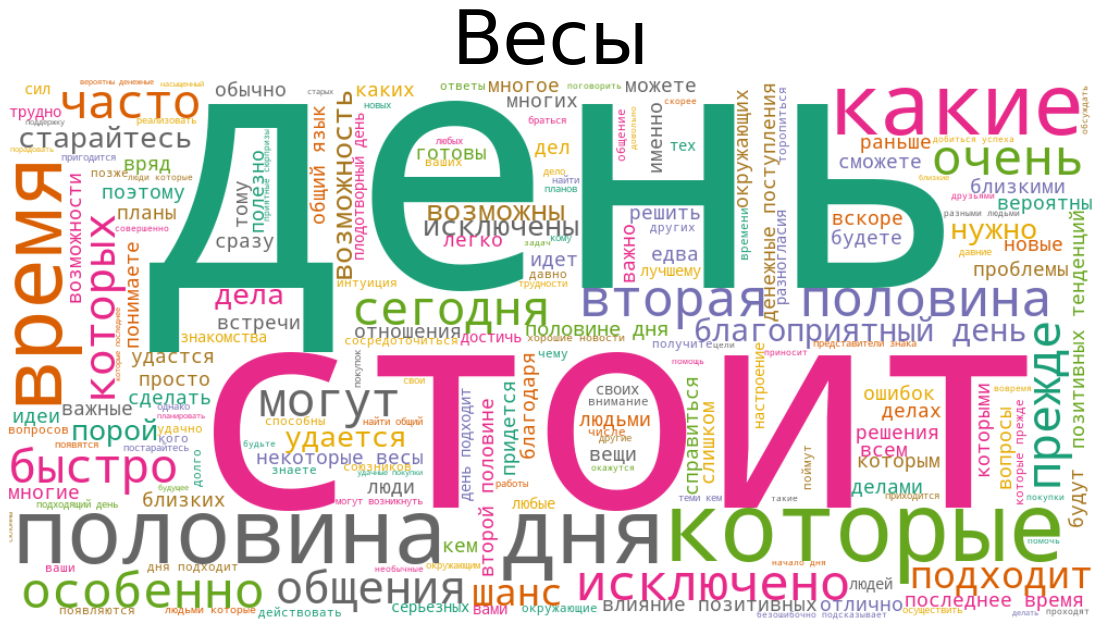

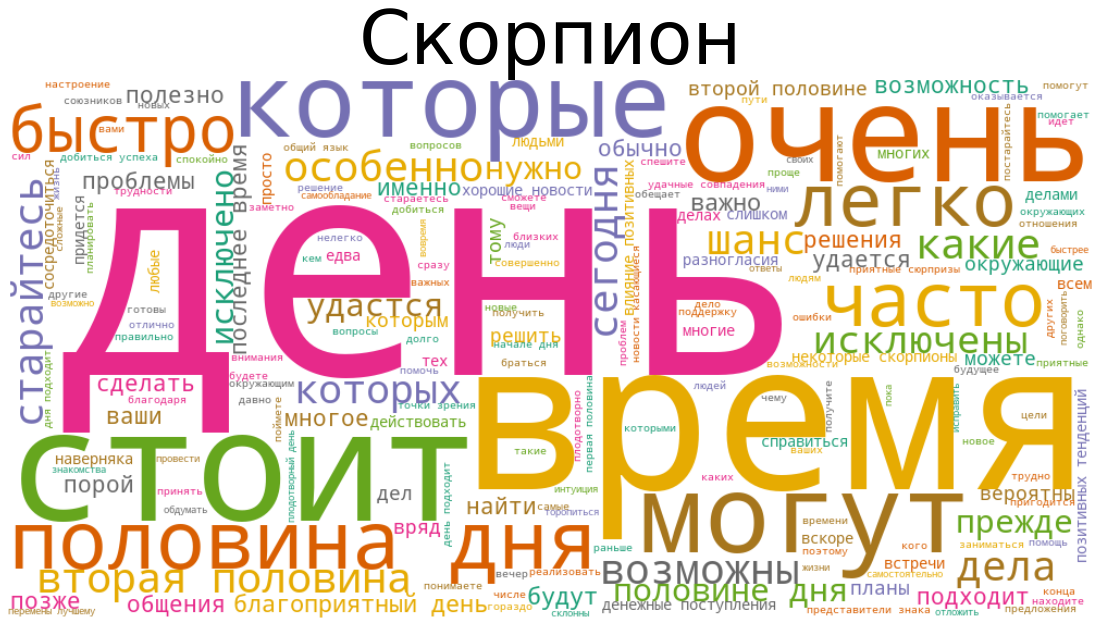

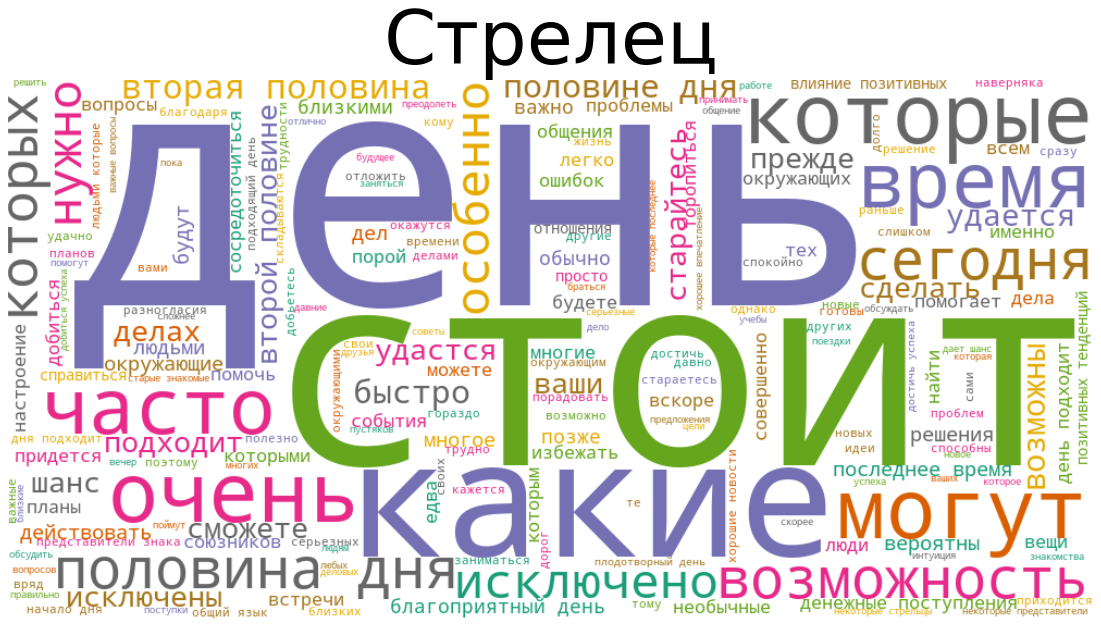

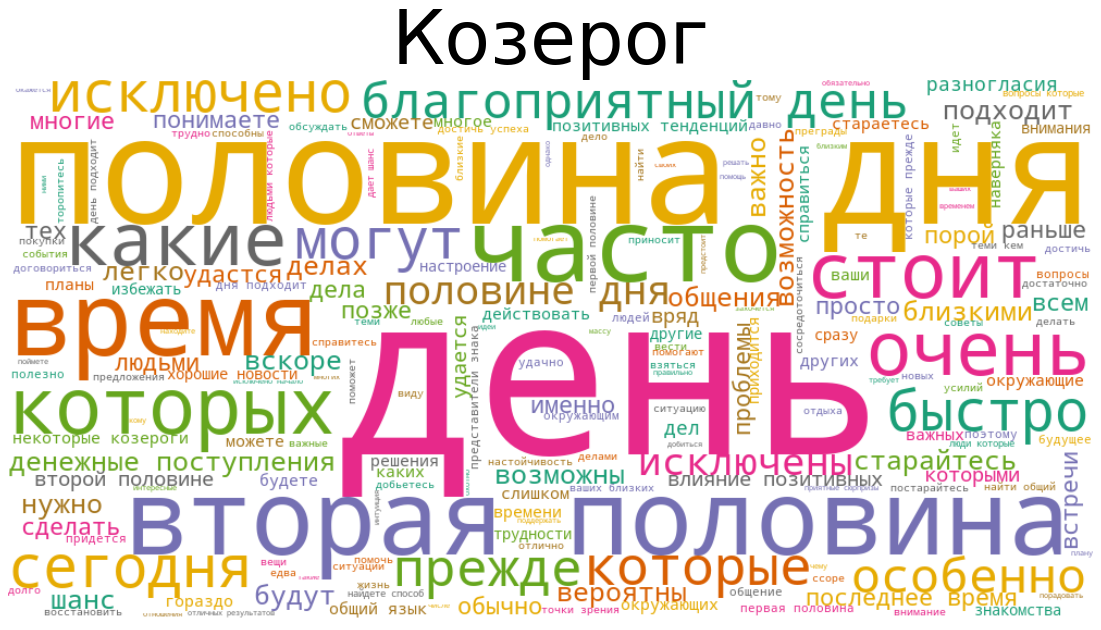

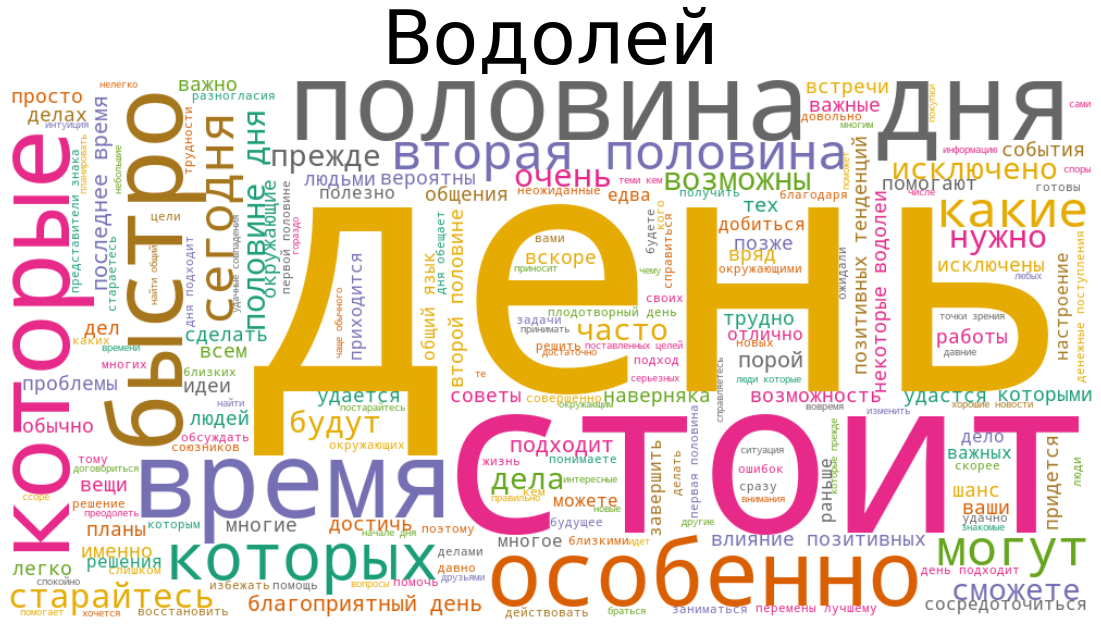

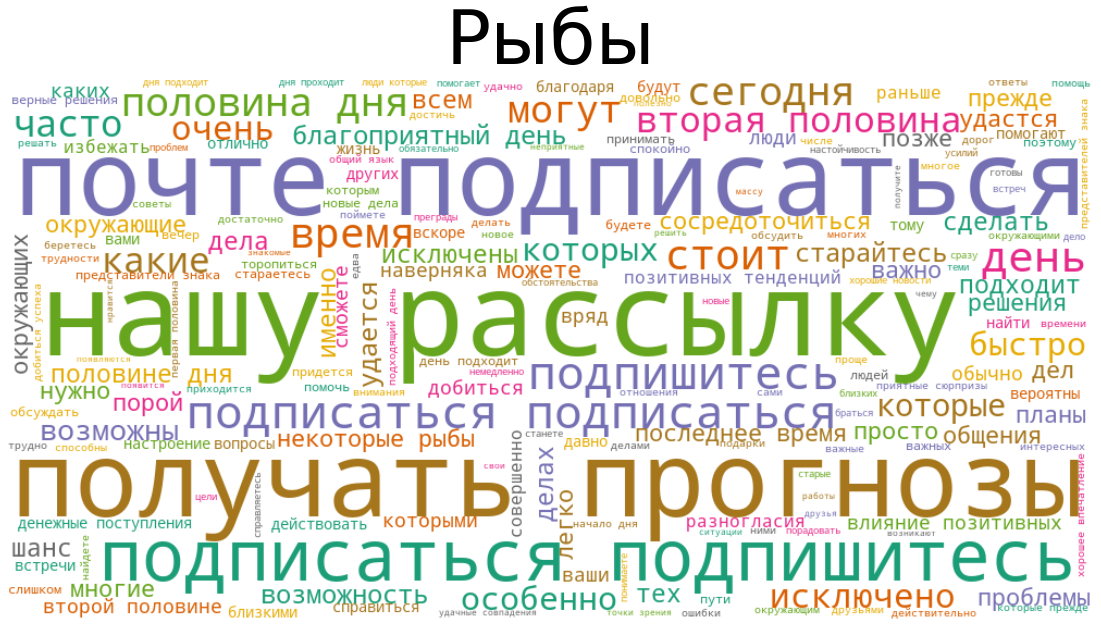

In [134]:
for col in ['Овен', 'Телец',
       'Близнецы', 'Рак', 'Лев', 'Дева', 'Весы', 'Скорпион', 'Стрелец',
       'Козерог', 'Водолей', 'Рыбы']:
    text_ = ''.join(data[col].values)
    wc = WordCloud(stopwords=stop_words, background_color="white", width=1000, height=500,colormap='Dark2').generate(text_.lower())
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(col,fontdict = {'fontsize' : 75})
    plt.show()

Чуть более стандартно.

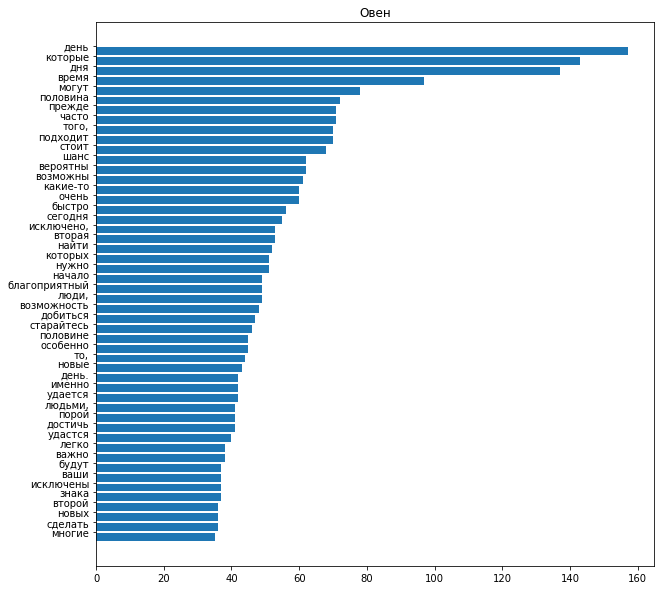

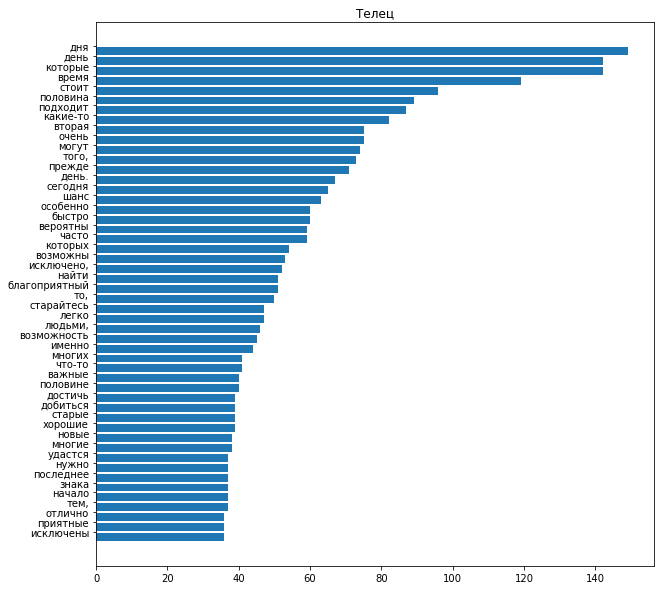

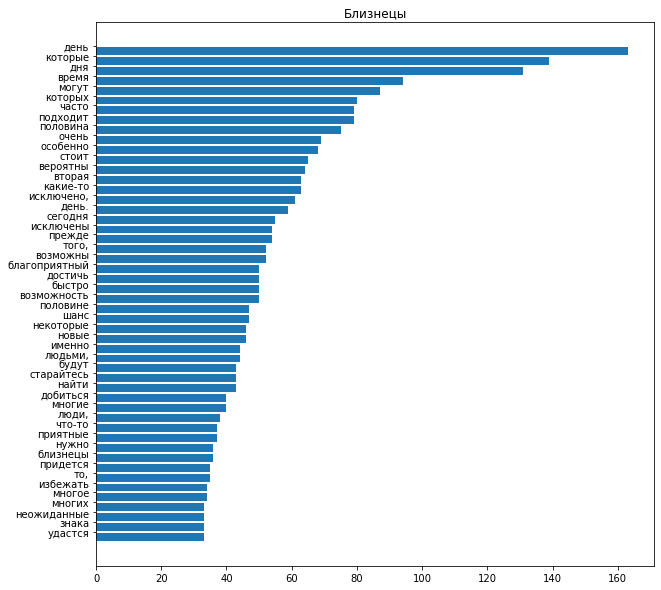

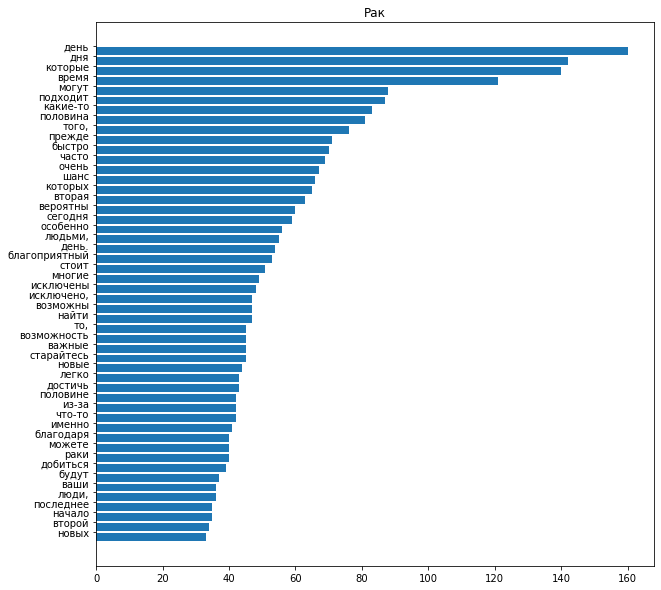

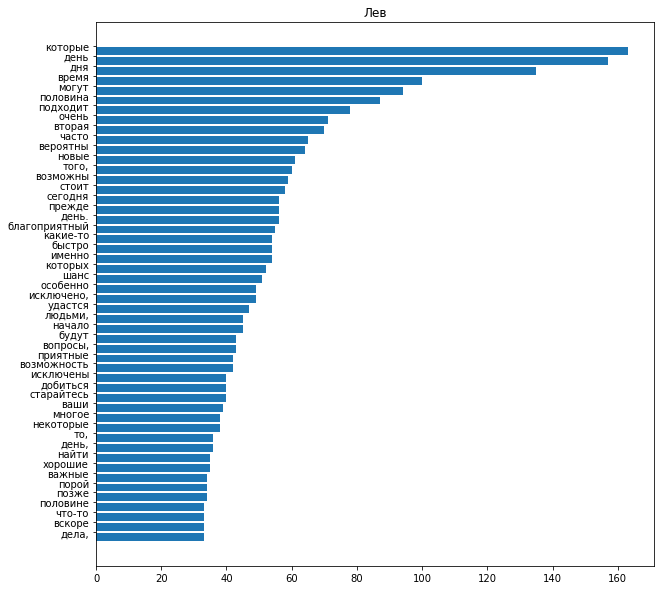

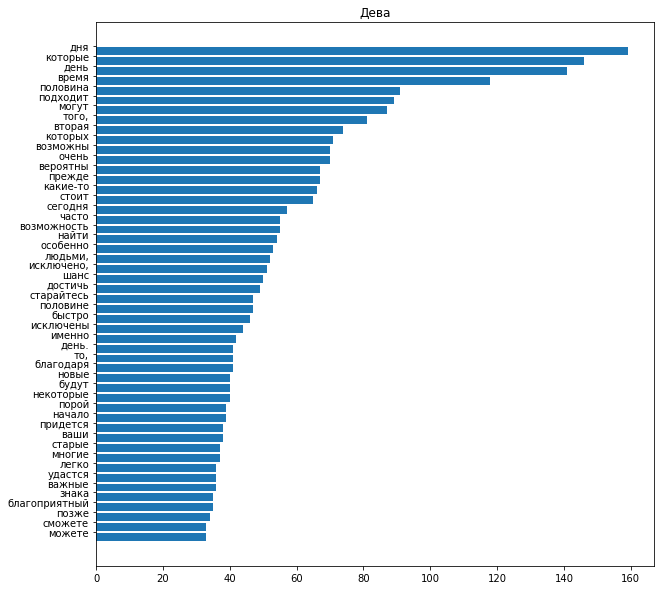

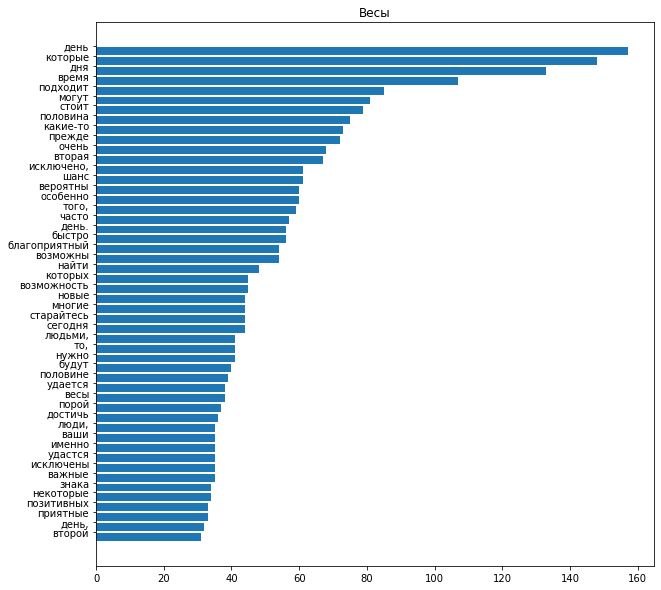

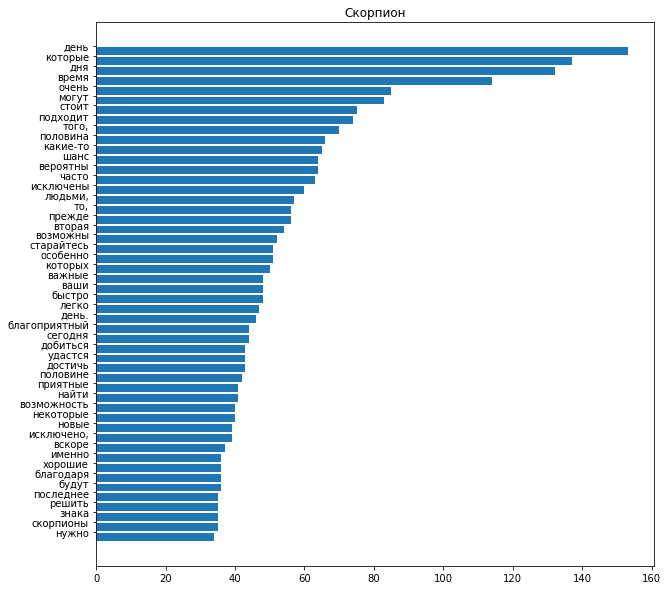

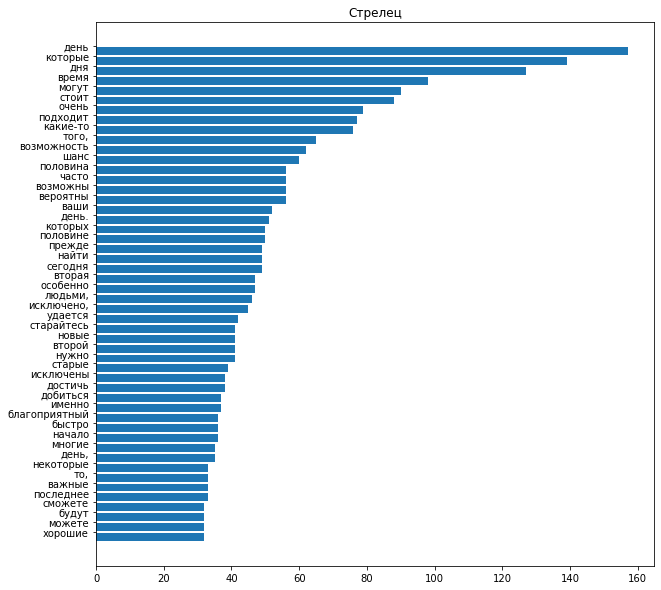

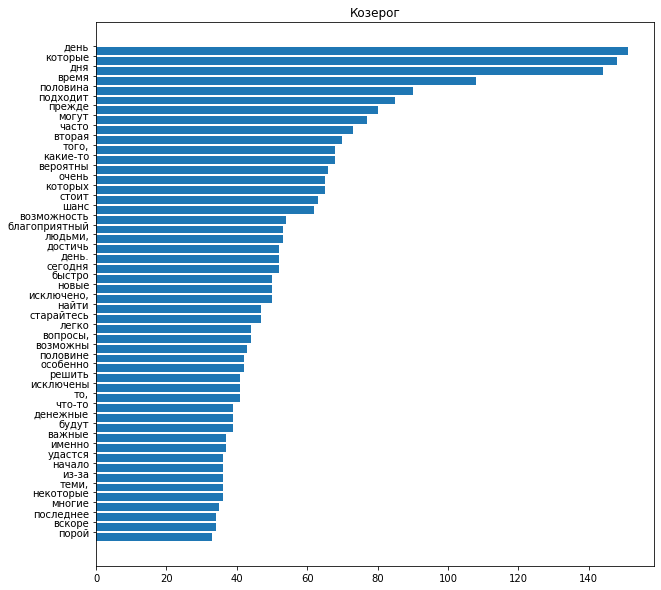

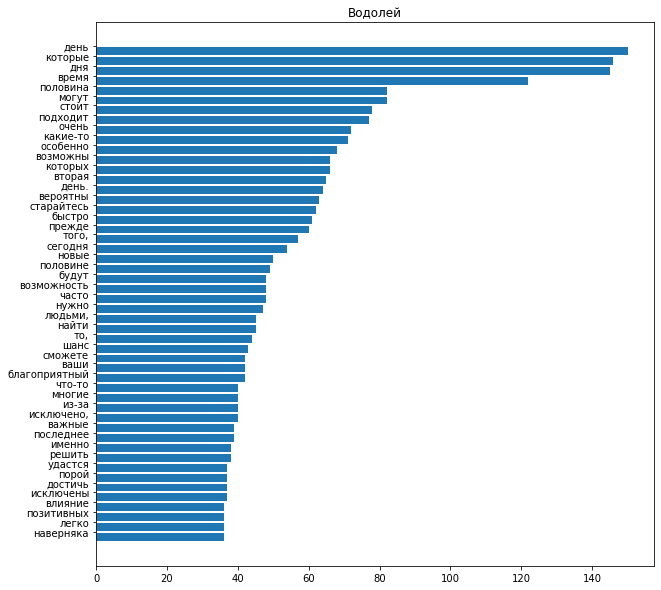

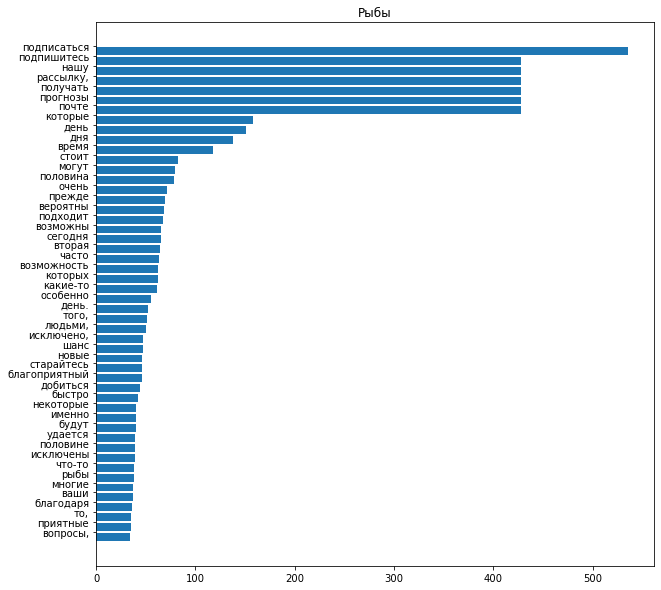

In [156]:
for col in ['Овен', 'Телец',
       'Близнецы', 'Рак', 'Лев', 'Дева', 'Весы', 'Скорпион', 'Стрелец',
       'Козерог', 'Водолей', 'Рыбы']:
    topic_words = [ z.lower() for y in
                       [ x.split() for x in data[col] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stop_words]
    plt.figure(figsize=(10,10))
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(col)
    plt.show()
